# Part 4. 시각화 도구

## 2. Seaborn - 고급 그래프 도구

### 1-1. 선 그래프

##### <예제 4-25> titanic 데이터셋

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
titanic = sns.load_dataset('titanic')

print(titanic.head(3))
print('*'*50)
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 

##### <예제 4-26> 회귀선이 있는 산점도

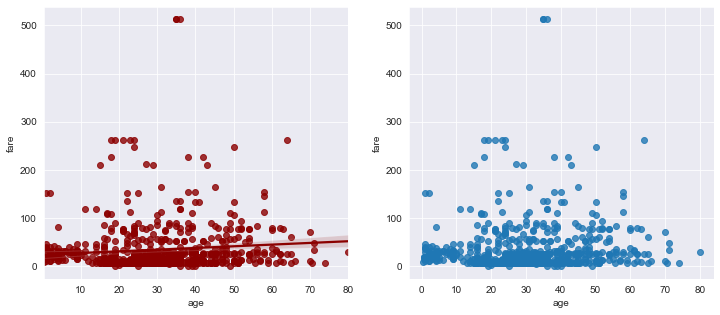

In [9]:
titanic = sns.load_dataset('titanic')

sns.set_style('darkgrid')

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.regplot('age', 'fare', data=titanic, ax=ax1, color='darkred')
sns.regplot('age', 'fare', data=titanic, ax=ax2, fit_reg=False)
plt.show()

##### <예제 4-27> 히스토그램/커널밀도함수

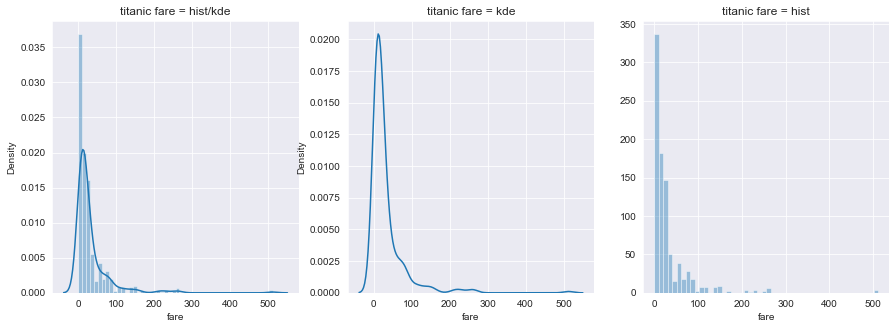

In [10]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.distplot(titanic['fare'], ax=ax1)
sns.distplot(titanic['fare'], hist=False, ax=ax2)
sns.distplot(titanic['fare'], kde=False, ax=ax3)

ax1.set_title('titanic fare = hist/kde')
ax2.set_title('titanic fare = kde')
ax3.set_title('titanic fare = hist')
plt.show()

##### <예제 4-28> 히트맵

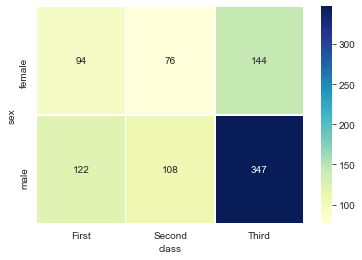

In [15]:
table = titanic.pivot_table(index='sex', columns='class', aggfunc='size')

sns.heatmap(table, annot=True, fmt='d', cmap='YlGnBu', linewidth=.5, cbar=False)
plt.show()

##### <예제 4-29> 범주형 데이터의 산점도

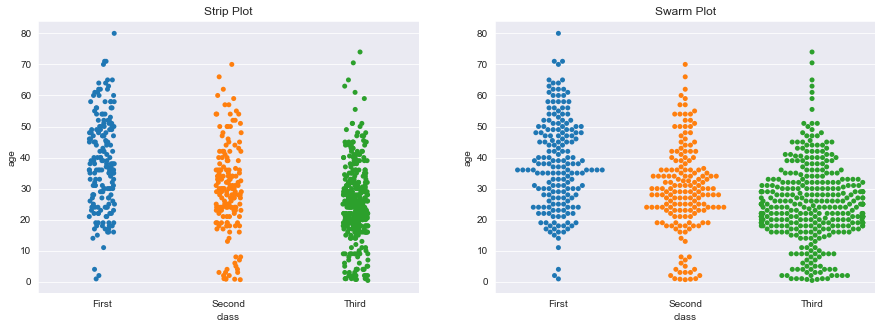

In [16]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.stripplot('class', 'age', data=titanic, ax=ax1)
sns.swarmplot('class', 'age', data=titanic, ax=ax2)

ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')
plt.show()

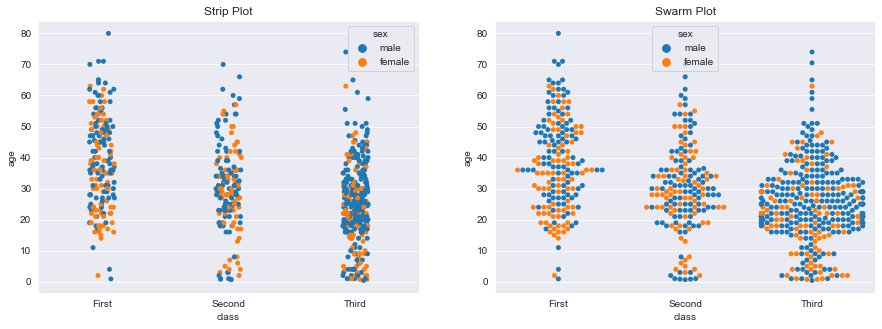

In [17]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.stripplot('class', 'age', hue='sex', data=titanic, ax=ax1)
sns.swarmplot('class', 'age', hue='sex', data=titanic, ax=ax2)

ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')
plt.show()

##### <예제 4-30> 막대 그래프

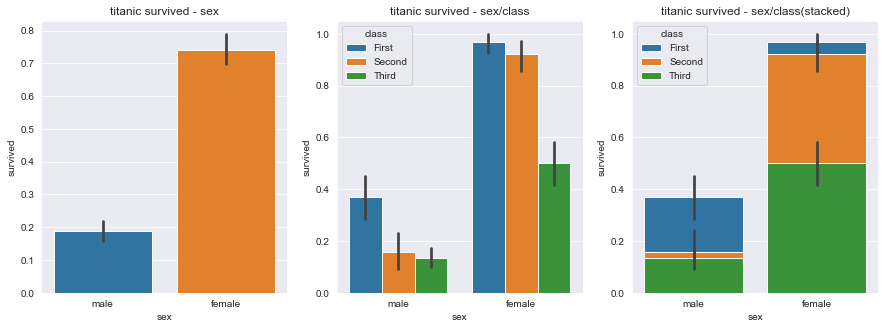

In [20]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.barplot('sex', 'survived', data=titanic, ax=ax1)
sns.barplot('sex', 'survived', hue='class', data=titanic, ax=ax2)
sns.barplot('sex', 'survived', hue='class', dodge=False, data=titanic, ax=ax3)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')
plt.show()

##### <예제 4-31> 빈도 그래프

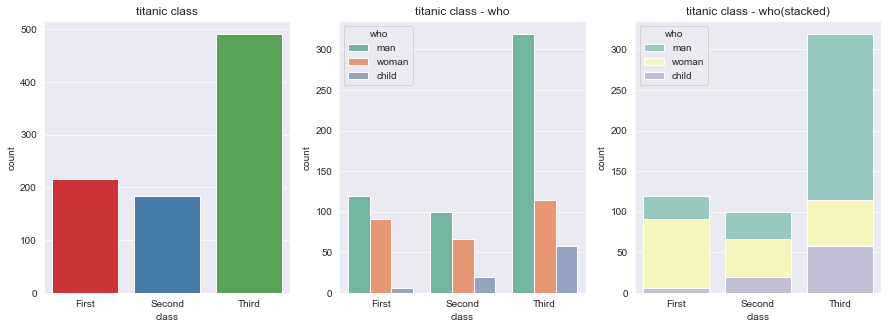

In [22]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.countplot('class', palette='Set1', data=titanic, ax=ax1)
sns.countplot('class', hue='who', palette='Set2', data=titanic, ax=ax2)
sns.countplot('class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3)

ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')
plt.show()